## Creating the data

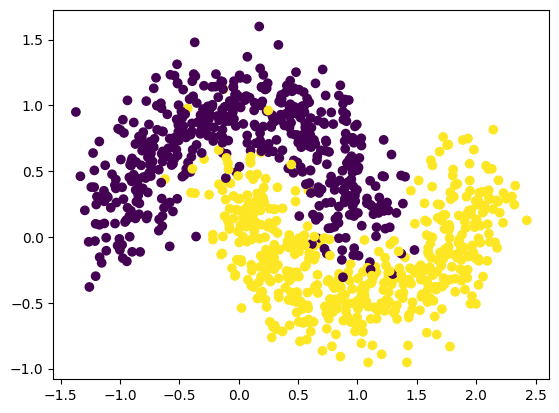

In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

NUM_SAMPLES = 1000
EPOCHS = 100
RANDOM_SEED = 42

# Creating the binary classification data
X, y = make_moons(n_samples=NUM_SAMPLES, shuffle=True, noise=0.2)

# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y);

In [7]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=RANDOM_SEED)

## Build the model

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [31]:
from torch import nn

# Building the model
class MoonsModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# Instantiate the model
model_0 = MoonsModel(input_features=2,
                     output_features=1,
                     hidden_units=8).to(device)
model_0

MoonsModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [32]:
# !pip install torchmetrics

In [33]:
from torchmetrics.classification import BinaryAccuracy

# Setting up the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setting up the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# Setting up the accuracy
torchmetrics_accuracy = BinaryAccuracy().to(device)

In [34]:
epochs = 2000

# Putting the data on the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    acc = torchmetrics_accuracy(y_pred, y_train)

    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = torchmetrics_accuracy(test_preds, y_test)


    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}| Loss: {loss:.5f}, Accuracy: {acc:0.2f}% | " \
              f"Test Loss: {test_loss:0.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0| Loss: 0.70689, Accuracy: 0.51% | Test Loss: 0.71592, Test Accuracy: 0.46%
Epoch: 100| Loss: 0.34052, Accuracy: 0.85% | Test Loss: 0.30727, Test Accuracy: 0.85%
Epoch: 200| Loss: 0.31710, Accuracy: 0.86% | Test Loss: 0.27069, Test Accuracy: 0.87%
Epoch: 300| Loss: 0.31457, Accuracy: 0.86% | Test Loss: 0.26580, Test Accuracy: 0.87%
Epoch: 400| Loss: 0.31183, Accuracy: 0.86% | Test Loss: 0.26295, Test Accuracy: 0.87%
Epoch: 500| Loss: 0.30740, Accuracy: 0.86% | Test Loss: 0.25922, Test Accuracy: 0.88%
Epoch: 600| Loss: 0.30150, Accuracy: 0.87% | Test Loss: 0.25451, Test Accuracy: 0.88%
Epoch: 700| Loss: 0.29543, Accuracy: 0.87% | Test Loss: 0.24951, Test Accuracy: 0.88%
Epoch: 800| Loss: 0.28893, Accuracy: 0.88% | Test Loss: 0.24404, Test Accuracy: 0.89%
Epoch: 900| Loss: 0.28145, Accuracy: 0.88% | Test Loss: 0.23739, Test Accuracy: 0.89%
Epoch: 1000| Loss: 0.27186, Accuracy: 0.88% | Test Loss: 0.22842, Test Accuracy: 0.89%
Epoch: 1100| Loss: 0.25808, Accuracy: 0.89% | Test Loss